In [1]:
from ZV_functions import *
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams.update({'font.size': 16})

In [8]:
#base_dir='/eos/home-a/ahakimi/www/ZV_analysis'
base_dir='D:\\Travail\\ZV_analysis\\'
year='2018_SR_new'
cut='Boosted_SR'
vers=''


if cut == 'Boosted_SR':
    features =['pt1', 'pt2', 'eta1',
           'eta2', 'mll',
           'FatJet_pt', 'FatJeteta',
           'Zlep_1', 'Zlep_2', 
           'vbs_jet_pt1', 'vbs_jet_pt2',
           'vbs_jet_eta1', 'vbs_jet_eta2',
           'mjj_max', 'detajj_mjjmax']
elif cut == 'Resolved_SR':
    features=['pt1', 'pt2', 'eta1',
           'eta2', 'mll',
           'Zlep_1', 'Zlep_2', 
           'vbs_jet_pt1', 'vbs_jet_pt2',
           'vbs_jet_eta1', 'vbs_jet_eta2',
           'V_jet_pt1', 'V_jet_pt2',
           'V_jet_eta1', 'V_jet_eta2',
           'mjj_max', 'detajj_mjjmax',
           'V_jet_mass']


In [9]:
X,y, variables_list=prep_data(year, cut, vers, base_dir) #

xlims=[(0,200),(0,150),(-3,3),(-3,3),(0,150),(0,5),(0,10),(0,900),(-5,5),(0,200),(0,1),(-1.5,1.5),(-1.5,1.5),(-1,1),
       (0,200),(0,200),(-5,5),(-5,5),
           (0,200),(0,100),(-5,5),(-5,5),(0,3000),(0,10),(0,4),(0,150)]

#plot_distrib(variables_list, xlims,base_dir, year, cut)
print('NUmber of events: {}, signal : {}, bkg: {}'.format(len(y),len(y[y['signal']==1]),len(y[y['signal']==0])))
print('SOW: {}, signal : {}, bkg: {}'.format(sum(y['weight_']),sum(y['weight_'][y['signal']==1]),sum(y['weight_'][y['signal']==0])))

Boosted_SR_pt1 147.63426 104.01022
Boosted_SR_pt2 60.33027 41.43365
Boosted_SR_eta1 -0.0097989645 1.2106419
Boosted_SR_eta2 -0.0043315254 1.2114636
Boosted_SR_mll 90.81821 4.24836
Boosted_SR_Zepp_ll 0.7101834 0.7125248
Boosted_SR_nFatJet 2.1728036696590154 0.7309738046018177
Boosted_SR_FatJet_pt 307.9248 160.39818
Boosted_SR_FatJeteta -5.1237793 71.33908
Boosted_SR_FatJet_softdropmass 85.68005 12.686821
Boosted_SR_FatJet_tau21 -4.7904153 71.3557
Boosted_SR_Zlep_1 -0.0085312715 0.5673623
Boosted_SR_Zlep_2 -0.00710825 0.5831202
Boosted_SR_category 0.0 0.0
Boosted_SR_vbs_jet_pt1 219.50323 158.23256
Boosted_SR_vbs_jet_pt2 70.87412 54.013393
Boosted_SR_vbs_jet_eta1 0.01463356 1.7254668
Boosted_SR_vbs_jet_eta2 0.0037201687 2.5257003
Boosted_SR_V_jet_pt1 -999.0 0.0
Boosted_SR_V_jet_pt2 -999.0 0.0
Boosted_SR_V_jet_eta1 -999.0 0.0
Boosted_SR_V_jet_eta2 -999.0 0.0
Boosted_SR_mjj_max 743.6613 549.96735
Boosted_SR_detajj_mjjmax 3.5381424 1.1642021
Boosted_SR_dphijj_mjjmax 1.6551471 0.9019949
Boost

D:\Travail\ZV_analysis\ZV_functions.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['signal']=y['signal'].astype('int32')
D:\Travail\ZV_analysis\ZV_functions.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['w']=0
D:\Travail\ZV_analysis\ZV_functions.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['

In [4]:
data_dir=base_dir+year+'\\'+cut+'\\data'+vers

res_dir=base_dir+year+'\\'+cut+'\\BDT_res'+vers

input_list= features

          
inputs= [cut+'_'+i for i in input_list]

if not os.path.exists(res_dir):
        os.makedirs(res_dir)

X= pd.DataFrame(np.load(data_dir+'\\X_{}_{}{}.npy'.format(year,cut,vers), allow_pickle=True), columns=variables_list)
X=X[inputs]
y= pd.DataFrame(np.load(data_dir+'\\y_{}_{}{}.npy'.format(year,cut,vers), allow_pickle=True), columns= ['signal','sample','group','weight_', 'w'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)


dtrain=xgb.DMatrix(data=X_train,label=y_train['signal'], feature_names=inputs, weight=y_train['w'])
dtest=xgb.DMatrix(data=X_test,label=y_test['signal'], feature_names=inputs, weight=y_test['w'])



param = {
    # Parameters that we are going to tune.
    'max_depth':3,
    'min_child_weight': sum(y['w'])/len(y),
    'eta':0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    # Other parameters
    'objective':'binary:logistic',
    'eval_metric': 'auc', 
    'alpha':10,
    'lambda':10
}

#use gpu if available
gpu=tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)
if gpu==True:
    param['tree_method']='gpu_hist'
    

num_boost_round=800
es_rounds=5
#watchlist=
progress={}

metrics={'logloss','auc'} #last one used for es

#define custom eval metrics: sig/sqrt(bkg) and ks test (sig et bkg)
def SoverB(preds, dtrain):
    y=dtrain.get_label()
    cut_off=0.8
    pred_over_cutoff=preds[preds >=cut_off]
    y_over_cutoff = y[preds >=cut_off]
    if ( (len(pred_over_cutoff[y_over_cutoff == 0]))):
        score = len(pred_over_cutoff[y_over_cutoff == 1]) / np.sqrt(len(pred_over_cutoff[y_over_cutoff == 0]))
    else : score = 0
    return 'SoverB', score

  

# Cross validation

[0]	train-auc:0.78283+0.00151	train-logloss:0.66956+0.00020	test-auc:0.78000+0.00335	test-logloss:0.66982+0.00033
[10]	train-auc:0.81661+0.00113	train-logloss:0.56384+0.00046	test-auc:0.81372+0.00230	test-logloss:0.56556+0.00125
[20]	train-auc:0.82452+0.00083	train-logloss:0.53045+0.00063	test-auc:0.82130+0.00233	test-logloss:0.53312+0.00168
[30]	train-auc:0.83087+0.00061	train-logloss:0.51491+0.00067	test-auc:0.82720+0.00237	test-logloss:0.51843+0.00201
[40]	train-auc:0.83496+0.00072	train-logloss:0.50630+0.00081	test-auc:0.83086+0.00211	test-logloss:0.51057+0.00197
[50]	train-auc:0.83752+0.00061	train-logloss:0.50107+0.00065	test-auc:0.83302+0.00207	test-logloss:0.50600+0.00213
[60]	train-auc:0.83967+0.00056	train-logloss:0.49715+0.00065	test-auc:0.83485+0.00197	test-logloss:0.50264+0.00209
[70]	train-auc:0.84124+0.00061	train-logloss:0.49430+0.00074	test-auc:0.83599+0.00188	test-logloss:0.50045+0.00208
[80]	train-auc:0.84260+0.00061	train-logloss:0.49204+0.00073	test-auc:0.83710+0.0

[710]	train-auc:0.87063+0.00046	train-logloss:0.45223+0.00059	test-auc:0.84978+0.00162	test-logloss:0.48072+0.00225
[720]	train-auc:0.87095+0.00043	train-logloss:0.45179+0.00057	test-auc:0.84991+0.00157	test-logloss:0.48055+0.00218
[730]	train-auc:0.87125+0.00043	train-logloss:0.45137+0.00057	test-auc:0.85001+0.00153	test-logloss:0.48041+0.00212
[740]	train-auc:0.87154+0.00043	train-logloss:0.45097+0.00057	test-auc:0.85013+0.00152	test-logloss:0.48025+0.00209
[750]	train-auc:0.87183+0.00042	train-logloss:0.45057+0.00056	test-auc:0.85025+0.00152	test-logloss:0.48011+0.00210
[760]	train-auc:0.87210+0.00039	train-logloss:0.45019+0.00054	test-auc:0.85033+0.00153	test-logloss:0.48000+0.00212
[770]	train-auc:0.87237+0.00040	train-logloss:0.44980+0.00055	test-auc:0.85042+0.00155	test-logloss:0.47988+0.00214
[780]	train-auc:0.87266+0.00038	train-logloss:0.44939+0.00052	test-auc:0.85052+0.00153	test-logloss:0.47974+0.00210
[790]	train-auc:0.87294+0.00037	train-logloss:0.44900+0.00053	test-auc:0

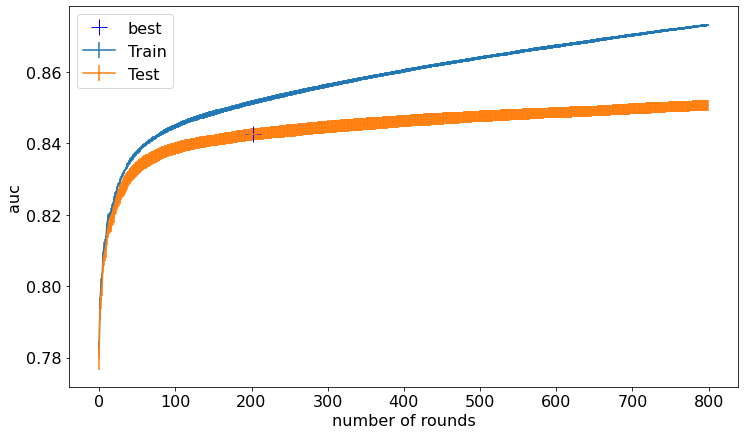

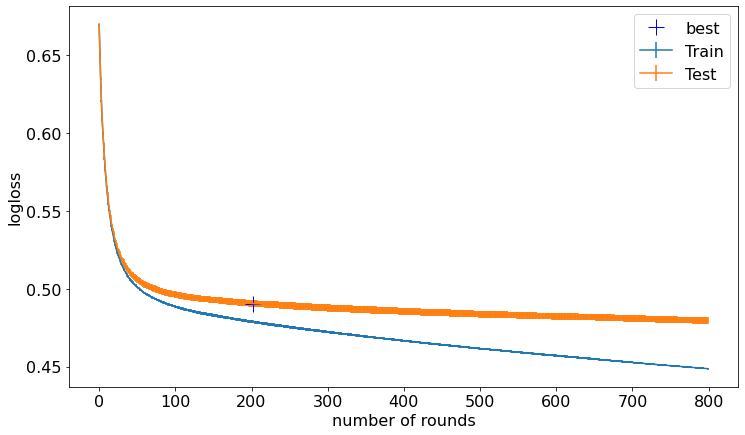

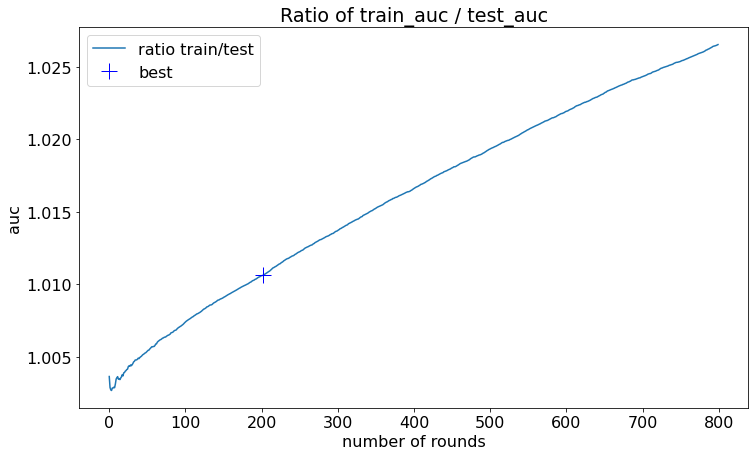

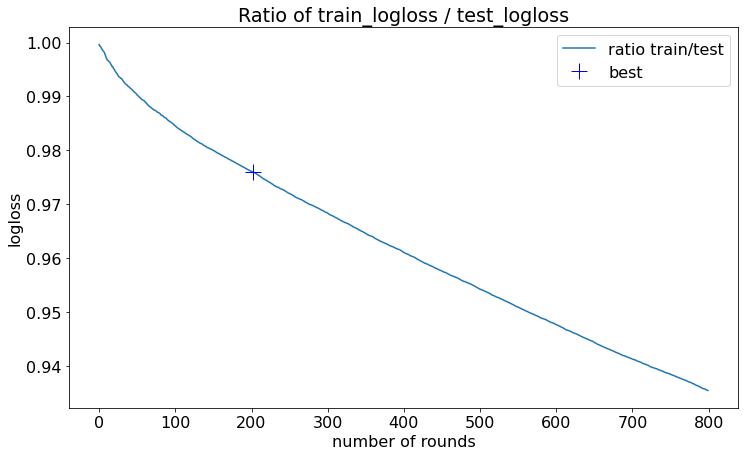

In [5]:
  
    
# set up cross validation:
cv_results = xgb.cv(
    param,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics=metrics,
    #feval=SoverB,
    early_stopping_rounds=es_rounds,
    shuffle=True,
    verbose_eval=10
)

## we define best score as the best test_auc penalized by the gap between train and test auc
alpha=1 #(penalization)
best_score=(cv_results['test-auc-mean']-alpha*abs(cv_results['test-auc-mean']-cv_results['train-auc-mean'])).max()
boost_rounds = (cv_results['test-auc-mean']-alpha*abs(cv_results['test-auc-mean']-cv_results['train-auc-mean'])).argmax()
print('best score:{} reached in {} rounds'.format(best_score, boost_rounds))


for metric in metrics:
    
    plt.figure(figsize=(12,7))
    x_axis=range(0,len(cv_results))
    plt.errorbar(x=x_axis,y=cv_results['train-{}-mean'.format(metric)],xerr=None, yerr=cv_results['train-{}-std'.format(metric)], label='Train')
    plt.errorbar(x=x_axis,y=cv_results['test-{}-mean'.format(metric)],xerr=None, yerr=cv_results['test-{}-std'.format(metric)], label='Test')
    plt.plot(boost_rounds, cv_results['test-{}-mean'.format(metric)][boost_rounds], 'b+', label='best', markersize=16)
    #plt.vlines(x=boost_rounds, ymin=0, ymax=cv_results['train-{}-mean'.format(metric)].max(), label='best score')
    plt.ylabel(metric)
    #plt.ylim(0.4,0.9)
    plt.xlabel('number of rounds')
    plt.legend()
    plt.savefig(res_dir+'/{}{}_{}_{}.png'.format(year,vers,cut,metric))

#plot ratio train/test
for metric in metrics:
    
    plt.figure(figsize=(12,7))
    x_axis=range(0,len(cv_results))
    ratio = (cv_results['train-{}-mean'.format(metric)]/cv_results['test-{}-mean'.format(metric)])
    plt.plot(ratio, label='ratio train/test')
    #plt.errorbar(x=x_axis,y=cv_results['test-{}-mean'.format(metric)],xerr=None, yerr=cv_results['test-{}-std'.format(metric)], label='Test')
    plt.plot(boost_rounds, ratio[boost_rounds], 'b+', label='best', markersize=16)
    #plt.vlines(x=boost_rounds, ymin=0, ymax=cv_results['train-{}-mean'.format(metric)].max(), label='best score')
    plt.ylabel(metric)
    #plt.ylim(0.8,1.2)
    plt.xlabel('number of rounds')
    plt.title('Ratio of train_{} / test_{}'.format(metric, metric))
    plt.legend()
    plt.savefig(res_dir+'/{}{}_{}_{}_ratio.png'.format(year,vers,cut,metric))

Training on 308649 events, signal : 33619, bkg: 275030
Testing on 77163 events, signal : 8403, bkg: 68760
[0]	Train-auc:0.78269	Test-auc:0.78022
[10]	Train-auc:0.81527	Test-auc:0.81100
[20]	Train-auc:0.82412	Test-auc:0.81902
[30]	Train-auc:0.83082	Test-auc:0.82521
[40]	Train-auc:0.83452	Test-auc:0.82834
[50]	Train-auc:0.83688	Test-auc:0.83025
[60]	Train-auc:0.83886	Test-auc:0.83185
[70]	Train-auc:0.84065	Test-auc:0.83337
[80]	Train-auc:0.84205	Test-auc:0.83449
[90]	Train-auc:0.84298	Test-auc:0.83510
[100]	Train-auc:0.84408	Test-auc:0.83582
[110]	Train-auc:0.84501	Test-auc:0.83652
[120]	Train-auc:0.84569	Test-auc:0.83694
[130]	Train-auc:0.84649	Test-auc:0.83746
[140]	Train-auc:0.84705	Test-auc:0.83771
[150]	Train-auc:0.84775	Test-auc:0.83804
[160]	Train-auc:0.84824	Test-auc:0.83837
[170]	Train-auc:0.84884	Test-auc:0.83879
[180]	Train-auc:0.84930	Test-auc:0.83906
[190]	Train-auc:0.84970	Test-auc:0.83917
[200]	Train-auc:0.85009	Test-auc:0.83938
[201]	Train-auc:0.85017	Test-auc:0.83941
mod

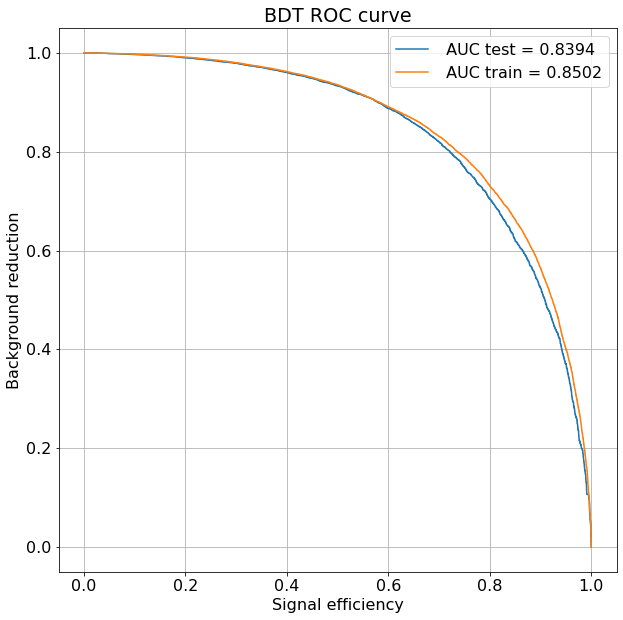

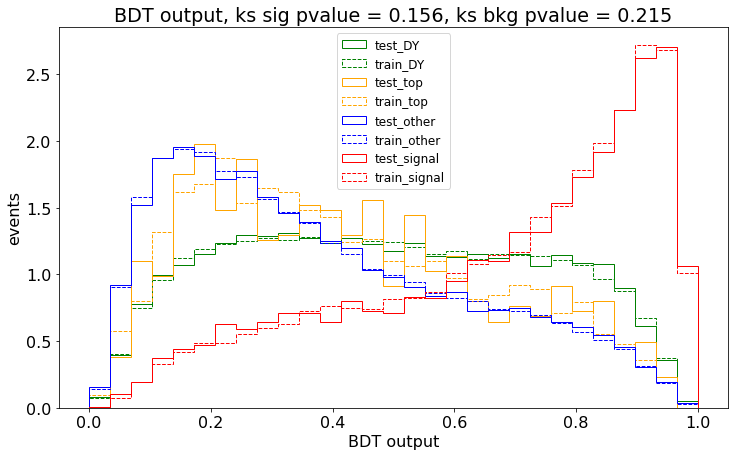

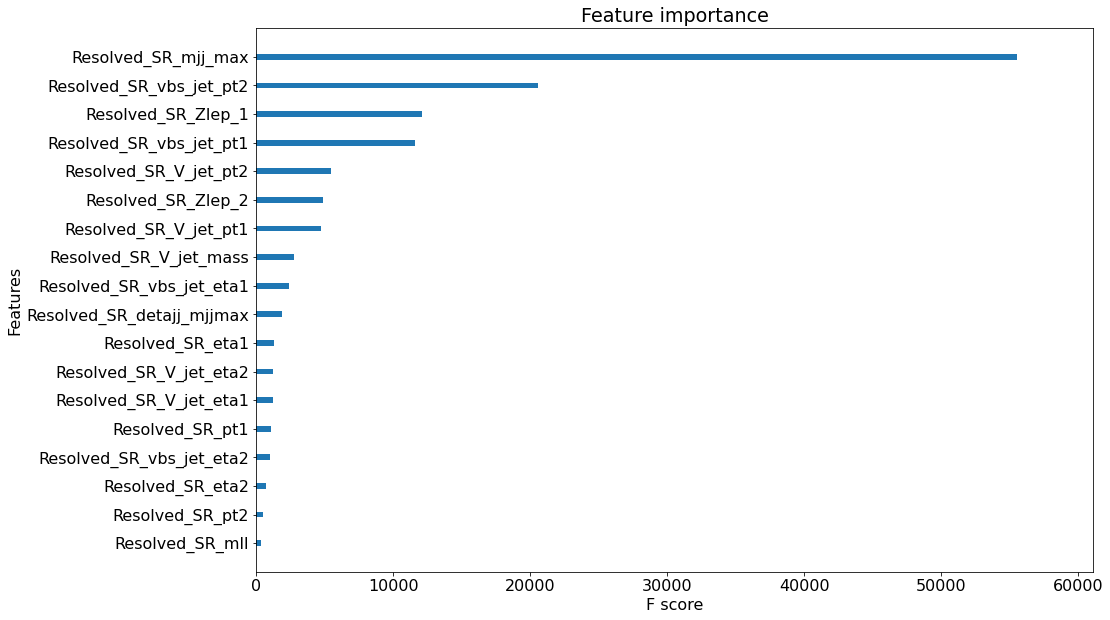

In [6]:
#Now train and fit best parameters BDT
print('Training on {} events, signal : {}, bkg: {}'.format(len(y_train),len(y_train[y_train['signal']==1]),len(y_train[y_train['signal']==0])))
print('Testing on {} events, signal : {}, bkg: {}'.format(len(y_test),len(y_test[y_test['signal']==1]),len(y_test[y_test['signal']==0])))
eval_result = {}
BDT = xgb.train(
    param,
    dtrain,
    num_boost_round=boost_rounds,
    #feval = SoverB,
    evals=[(dtrain, 'Train'),(dtest, "Test")],
    evals_result = eval_result,
    verbose_eval=10,
)
BDT.save_model(res_dir+'/{}{}_{}.model'.format(year,vers,cut))
print('model saved')
predictions_BDT_test=BDT.predict(dtest)
predictions_BDT_train=BDT.predict(dtrain)

#kolmogorov test 
from scipy import stats
ks_test_sig=stats.ks_2samp(predictions_BDT_test[y_test['signal']==1],predictions_BDT_train[y_train['signal']==1])
ks_test_bkg=stats.ks_2samp(predictions_BDT_test[y_test['signal']==0],predictions_BDT_train[y_train['signal']==0])
if ((ks_test_sig[1]>=0.05) & (ks_test_bkg[1]>=0.05)):  #pass test if pvalue > 5%
    print('KS test passed for sig: cannot distinguish the 2 distributions (pvalue ={})'.format(ks_test_sig[1]))
    print('KS test passed for bkg: cannot distinguish the 2 distributions (pvalue ={})'.format(ks_test_bkg[1]))
else: 
    print('KS test failed (pvalue ={}),Sig distributions are too different, check overtraining '.format(ks_test_sig[1]))
    print('KS test failed (pvalue ={}),Bkg distributions are too different, check overtraining '.format(ks_test_bkg[1]))
    

#plot AUC
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10,10))
fpr, tpr, threshold = roc_curve(y_test['signal'].astype('int32'),predictions_BDT_test, pos_label=1, sample_weight=y_test['w'])
fpr.sort()
tpr.sort()
roc_auc_test = auc(fpr, tpr)
print ("AUC Score (Test): {:4%}".format(roc_auc_test))
plt.plot(tpr,(1-fpr), label =' AUC test = %0.4f' %(roc_auc_test))
fpr, tpr, threshold = roc_curve(y_train['signal'].astype('int32'),predictions_BDT_train, pos_label=1, sample_weight=y_train['w'])
fpr.sort()
tpr.sort()
roc_auc_train = auc(fpr, tpr)
print ("AUC Score (Test): {:4%}".format(roc_auc_train))
plt.plot(tpr,(1-fpr), label =' AUC train = %0.4f' %(roc_auc_train))
#plt.ylim(0.6,1.05)
plt.xlabel('Signal efficiency')
plt.ylabel('Background reduction')
plt.title('BDT ROC curve')
plt.grid()
plt.legend()
plt.savefig(res_dir+'/{}{}_{}_ROC.png'.format(year,vers,cut))

#plot BDT ouput by sample
plt.figure(figsize=(12,7))
groups=['DY','top','other','signal']
color=['green', 'orange','blue','red']
x=[]
nbins=30
for i,group in enumerate(groups):    
    plt.hist(predictions_BDT_test[y_test['group']==group],bins=np.linspace(0,1,nbins), label='test_'+group, density=True, histtype='step', color=color[i])
    plt.hist(predictions_BDT_train[y_train['group']==group],bins=np.linspace(0,1,nbins), label='train_'+group, density=True, histtype='step', color=color[i], linestyle='dashed')
plt.xlabel('BDT output')
plt.ylabel('events')
plt.title('BDT output, ks sig pvalue = {:.3f}, ks bkg pvalue = {:.3f}'.format(ks_test_sig[1], ks_test_bkg[1]))
plt.legend(fontsize=12, loc = 'upper center')
plt.savefig(res_dir+'\\{}{}_{}_BDToutput_trainvstest.png'.format(year,vers,cut))

#plot importance
#importance
plt.figure(figsize=(15,10))
ax=plt.subplot(111)
xgb.plot_importance(BDT,ax,grid=False, importance_type='total_gain', show_values=False);
plt.savefig(res_dir+'/{}{}_{}importance.png'.format(year,vers,cut))
    

# save config:
file_name=res_dir+'\\{}{}_{}_BDTconfig.txt'.format(year,vers,cut)
with open(file_name, 'w') as f:
    f.write('BDT config: \n year = {} \n cut ={} \n vers= {} \n '.format(year, cut, vers))
    f.write('params = {} \n n_rounds= {} \n auc_train ={}\n auc_test={} \n ks_test_sig={} \n ks_test_bkg = {}'.format(param, boost_rounds, roc_auc_train, roc_auc_test, ks_test_sig, ks_test_bkg))
    f.write('input_list: {}\n'.format(inputs))
    f.write('Training on {} events, signal : {}, bkg: {}\n'.format(len(y_train),len(y_train[y_train['signal']==1]),len(y_train[y_train['signal']==0])))
    f.write('Testing on {} events, signal : {}, bkg: {}'.format(len(y_test),len(y_test[y_test['signal']==1]),len(y_test[y_test['signal']==0])))
    

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


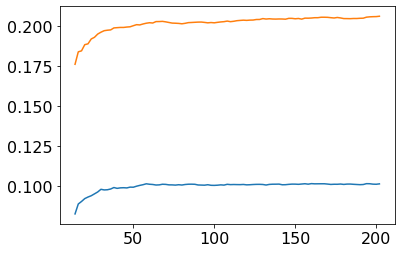

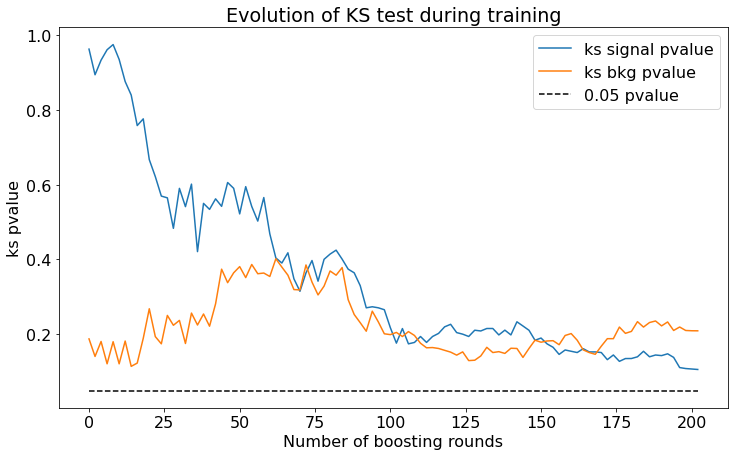

In [7]:
#save model every x round and continue training
freq = 2
models={}
ks_sig={}
ks_bkg={}
S_test={}
B_test={}
S_train={}
B_train={}
co=0.8
i=0
BDT = xgb.train(
    param,
    dtrain,
    num_boost_round=freq,
)
predictions_test={}
predictions_train={}
models[i]= BDT
predictions_test[i] = BDT.predict(dtest)
predictions_train[i] = BDT.predict(dtrain)
ks_sig[i]=stats.ks_2samp(predictions_test[i][y_test['signal']==1],predictions_train[i][y_train['signal']==1])[1]
ks_bkg[i]=stats.ks_2samp(predictions_test[i][y_test['signal']!=1],predictions_train[i][y_train['signal']!=1])[1]
S_test[i]=sum(y_test['weight_'][predictions_test[i]>=co][y_test['signal'][predictions_test[i]>=co] == 1])
S_train[i]=sum(y_train['weight_'][predictions_train[i]>=co][y_train['signal'][predictions_train[i]>=co] == 1])
B_test[i]=sum(y_test['weight_'][predictions_test[i]>=co][y_test['signal'][predictions_test[i]>=co] == 0])
B_train[i]=sum(y_train['weight_'][predictions_train[i]>=co][y_train['signal'][predictions_train[i]>=co] == 0])
for i in range(1, int(boost_rounds/freq)+1):
    #print(i)
    BDT =  xgb.train(
    param,
    dtrain,
    num_boost_round=freq,
    xgb_model = BDT
    )
    models[i]= BDT
    predictions_test[i]=BDT.predict(dtest)
    predictions_train[i] = BDT.predict(dtrain)
    ks_sig[i]=stats.ks_2samp(predictions_test[i][y_test['signal']==1],predictions_train[i][y_train['signal']==1])[1]
    ks_bkg[i]=stats.ks_2samp(predictions_test[i][y_test['signal']!=1],predictions_train[i][y_train['signal']!=1])[1]
    S_test[i]=sum(y_test['weight_'][predictions_test[i]>=co][y_test['signal'][predictions_test[i]>=co] == 1])
    S_train[i]=sum(y_train['weight_'][predictions_train[i]>=co][y_train['signal'][predictions_train[i]>=co] == 1])
    B_test[i]=sum(y_test['weight_'][predictions_test[i]>=co][y_test['signal'][predictions_test[i]>=co] == 0])
    B_train[i]=sum(y_train['weight_'][predictions_train[i]>=co][y_train['signal'][predictions_train[i]>=co] == 0])

    
SoB_test=[]
SoB_train=[]
for i in range(0, len(S_test.values())):
    #print (S_test[i], B_test[i])
    SoB_test.append((S_test[i]/np.sqrt(B_test[i])))
    SoB_train.append((S_train[i]/np.sqrt(B_train[i])))
x=[i*freq for i in range(0, len(ks_sig))]
plt.plot(x, SoB_test)
plt.plot(x, SoB_train)
plt.savefig(res_dir+'/{}{}_{}_{}.png'.format(year,vers,cut,"trainingSoB"))


# plot ks
plt.figure(figsize=(12,7))
x=[i*freq for i in range(0, len(ks_sig))]
plt.plot(x, ks_sig.values(), label ="ks signal pvalue")
plt.plot(x, ks_bkg.values(),label="ks bkg pvalue")
plt.hlines(0.05, 0, boost_rounds, label = "0.05 pvalue", linestyle = "--", color = 'k')
plt.legend()
plt.xlabel("Number of boosting rounds")
plt.ylabel("ks pvalue")
plt.ylim=(0,1)
plt.title("Evolution of KS test during training")
plt.savefig(res_dir+'/{}{}_{}_{}.png'.format(year,vers,cut,"trainingKS"))
